In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0:5])
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2) # 80% training and 20% test


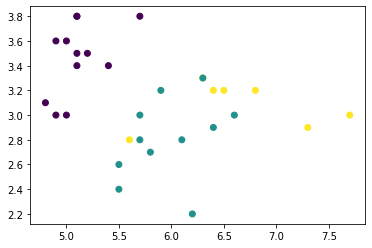

In [ ]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

import numpy as np

cost_value = np.square(np.subtract(y_test,y_pred)).mean()
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

In [ ]:
import scipy.stats as stats

X_train1, X_test1, y_train1, y_test1 = train_test_split(stats.zscore(iris.data), iris.target, test_size=0.2) 

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred1 = knn.predict(X_test1)

cost_value = np.square(np.subtract(y_test1,y_pred1)).mean()
cost_value

0.06666666666666667

In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_std = sc.fit_transform(iris.data)

# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X_std)

principle_components = pca.components_[:2]
explained_variance = pca.explained_variance_ratio_[:2]

X_project = pca.transform(X_std)[:,:2]

In [ ]:
import scipy.stats as stats

X_train2, X_test2, y_train2, y_test2= train_test_split(X_project, iris.target, test_size=0.2) 

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred2 = knn.predict(X_test2)

cost_value = np.square(np.subtract(y_test2,y_pred2)).mean()
cost_value

0.06666666666666667

In [ ]:
sc = StandardScaler()

X_std1 = sc.fit_transform(iris.data)

matrix_row, s, matrix_col = np.linalg.svd(X_std1)

pc = matrix_col[:2]

X_project1 = np.dot(X_std1, pc.T)

import scipy.stats as stats

X_train3, X_test3, y_train3, y_test3= train_test_split(X_project1, iris.target, test_size=0.2) 

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train3, y_train3)

#Predict the response for test dataset
y_pred3 = knn.predict(X_test3)

cost_value = np.square(np.subtract(y_test3,y_pred3)).mean()
cost_value

0.13333333333333333

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)

for train_index, test_index in kf.split(iris.data):
  X_train, X_test = iris.data[train_index], iris.data[test_index]
  y_train, y_test = iris.target[train_index], iris.target[test_index]

knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

cost_value = np.square(np.subtract(y_test,y_pred)).mean()
cost_value

0.6666666666666666

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, test_index in loo.split(iris.data):
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]

knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

cost_value = np.square(np.subtract(y_test,y_pred)).mean()
cost_value

0.0

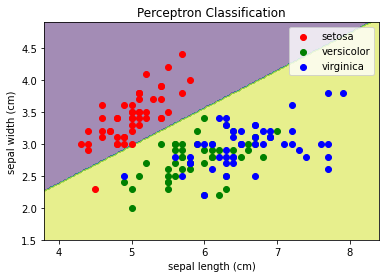

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Load the iris dataset and select two features
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Create a perceptron object and fit it to the data
clf = Perceptron(max_iter=1000, tol=1e-3)
clf.fit(X, y)

# Plot the decision boundary with labeled axes
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Perceptron Classification')

# Set the color and label of the data points based on their class
colors = ['red', 'green', 'blue']
labels = ['setosa', 'versicolor', 'virginica']
for i, color, label in zip(range(len(colors)), colors, labels):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=label)

plt.legend()
plt.show()

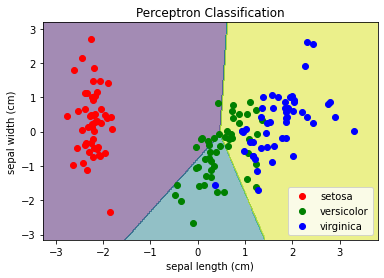

In [ ]:
# Load the iris dataset and select two features
iris = load_iris()
X = X_project[:, :2]
y = iris.target

# Create a perceptron object and fit it to the data
clf = Perceptron(max_iter=1000, tol=1e-3)
clf.fit(X, y)

# Plot the decision boundary with labeled axes
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Perceptron Classification')

# Set the color and label of the data points based on their class
colors = ['red', 'green', 'blue']
labels = ['setosa', 'versicolor', 'virginica']
for i, color, label in zip(range(len(colors)), colors, labels):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=label)

plt.legend()
plt.show()

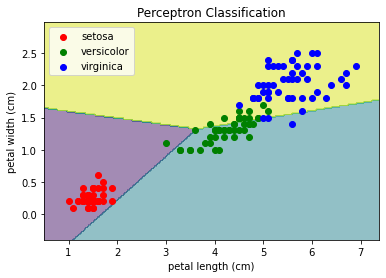

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Load the iris dataset and select two features
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target

# Create a perceptron object and fit it to the data
clf = Perceptron(max_iter=1000, tol=1e-3)
clf.fit(X, y)

# Plot the decision boundary with labeled axes
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Perceptron Classification')

# Set the color and label of the data points based on their class
colors = ['red', 'green', 'blue']
labels = ['setosa', 'versicolor', 'virginica']
for i, color, label in zip(range(len(colors)), colors, labels):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=label)

plt.legend()
plt.show()

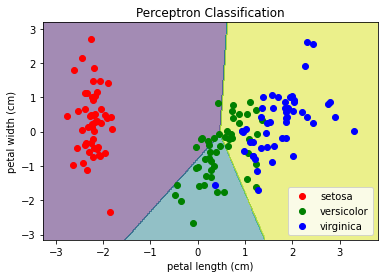

In [ ]:
# Load the iris dataset and select two features
iris = load_iris()
X = X_project[:, :2]
y = iris.target

# Create a perceptron object and fit it to the data
clf = Perceptron(max_iter=1000, tol=1e-3)
clf.fit(X, y)

# Plot the decision boundary with labeled axes
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.5)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('Perceptron Classification')

# Set the color and label of the data points based on their class
colors = ['red', 'green', 'blue']
labels = ['setosa', 'versicolor', 'virginica']
for i, color, label in zip(range(len(colors)), colors, labels):
    plt.scatter(X[y == i, 0], X[y == i, 1], c=color, label=label)

plt.legend()
plt.show()

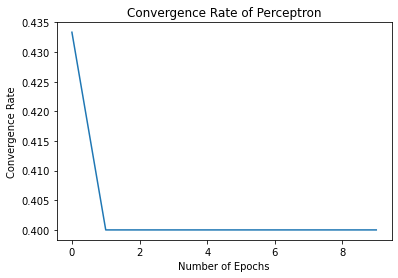

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# initialize weights and bias
w = np.zeros(X.shape[1])
b = 0

# define learning rate and maximum number of epochs
eta = 1
max_epochs = 10

# calculate convergence rate
convergence_rate = []
for i in range(max_epochs):
    error_count = 0
    for xi, yi in zip(X_test[:,:2], y_test):
        if yi * (np.dot(xi, w) + b) <= 0:
            w = w + eta * yi * xi
            b = b + eta * yi
            error_count += 1
    convergence_rate.append(error_count / X_test.shape[0])

# plot convergence rate
plt.plot(convergence_rate)
plt.title("Convergence Rate of Perceptron")
plt.xlabel("Number of Epochs")
plt.ylabel("Convergence Rate")
plt.show()